<a href="https://www.kaggle.com/code/rishvanthgv/pneumonia101-transformer?scriptVersionId=202233000" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,539 (6.20 MB)

 Trainable params: 1,625,539 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

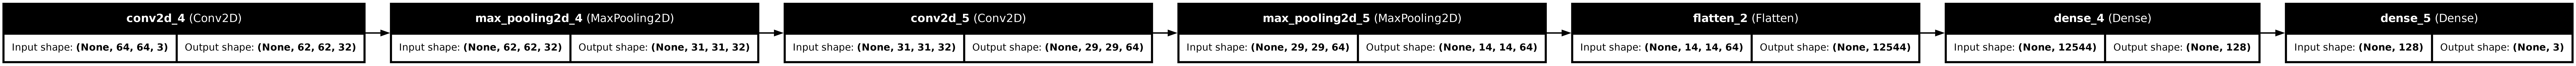

In [3]:
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# # Example CNN model
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(3, activation='softmax')
# ])

# # Displaying the model summary
# model.summary()

# # Plot the flow chart of the model with adjusted figure size
# plot_model(model, to_file='model_flow_chart_square_boxes.png', show_shapes=True, show_layer_names=True, rankdir='LR', dpi=300)

# # If you want to display it within a Jupyter Notebook, use the following:
# from IPython.display import Image
# Image('model_flow_chart_square_boxes.png')


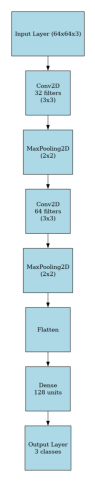

In [4]:
# from graphviz import Digraph
# import matplotlib.pyplot as plt

# # Define a simple CNN architecture
# model_layers = [
#     ("Input", "Input Layer (64x64x3)"),
#     ("Conv2D_1", "Conv2D\n32 filters\n(3x3)"),
#     ("MaxPool_1", "MaxPooling2D\n(2x2)"),
#     ("Conv2D_2", "Conv2D\n64 filters\n(3x3)"),
#     ("MaxPool_2", "MaxPooling2D\n(2x2)"),
#     ("Flatten", "Flatten"),
#     ("Dense_1", "Dense\n128 units"),
#     ("Output", "Output Layer\n3 classes")
# ]

# # Create a directed graph
# dot = Digraph()

# # Add nodes
# for layer in model_layers:
#     dot.node(layer[0], layer[1], shape='box', style='filled', fillcolor='lightblue', width='1.5', height='1.5')

# # Add edges (connections between layers)
# for i in range(len(model_layers) - 1):
#     dot.edge(model_layers[i][0], model_layers[i + 1][0])

# # Render the flowchart
# dot.format = 'png'
# dot.render('cnn_flowchart', cleanup=True)  # Save the diagram as a PNG file

# # Display the generated image
# img = plt.imread('cnn_flowchart.png')
# plt.figure(figsize=(10, 6))
# plt.imshow(img)
# plt.axis('off')  # Hide axes
# plt.show()


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Training Loss: 0.13933264123988176, Training Accuracy: 0.9491308793456033
Validation Loss: 0.11621009361318832, Validation Accuracy: 0.9555214723926381
Epoch 2, Training Loss: 0.04588643560930706, Training Accuracy: 0.9856850715746421
Validation Loss: 0.08743933693111583, Validation Accuracy: 0.9708588957055214
Epoch 3, Training Loss: 0.04845889668972641, Training Accuracy: 0.9838957055214724
Validation Loss: 0.0555026674688868, Validation Accuracy: 0.9762269938650306
Epoch 4, Training Loss: 0.013022882848880911, Training Accuracy: 0.9969325153374233
Validation Loss: 0.05835420542333755, Validation Accuracy: 0.9823619631901841
Epoch 5, Training Loss: 0.018382518620807333, Training Accuracy: 0.9928425357873211
Validation Loss: 0.07128704784429443, Validation Accuracy: 0.9838957055214724
Epoch 7, Training Loss: 0.013479448906345967, Training Accuracy: 0.9961656441717791
Validation Loss: 0.051857188094744426, Validation Accuracy: 0.9831288343558282
Epoch 8, Training Loss: 0.01063

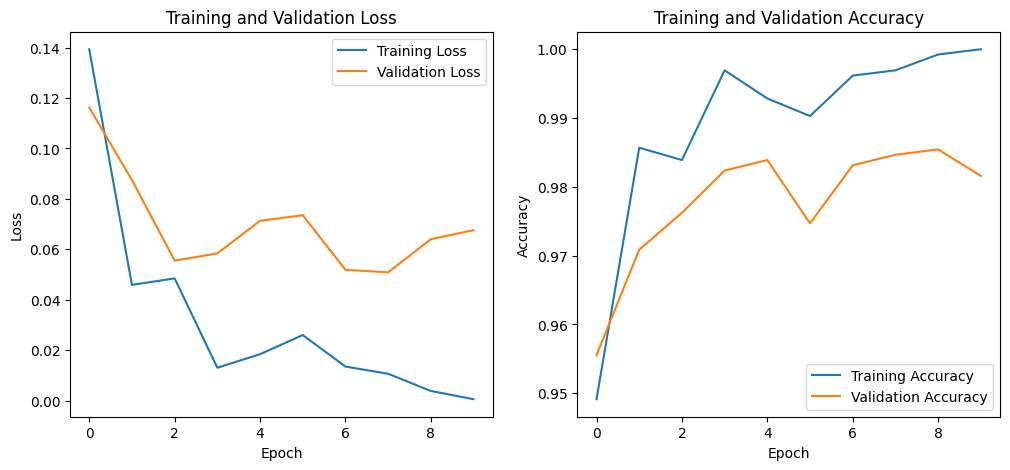

Confusion Matrix:
[[958  12]
 [ 12 322]]
Classification Report:
{'PNEUMONIA': {'precision': 0.9876288659793815, 'recall': 0.9876288659793815, 'f1-score': 0.9876288659793815, 'support': 970}, 'NORMAL': {'precision': 0.9640718562874252, 'recall': 0.9640718562874252, 'f1-score': 0.9640718562874252, 'support': 334}, 'accuracy': 0.9815950920245399, 'macro avg': {'precision': 0.9758503611334033, 'recall': 0.9758503611334033, 'f1-score': 0.9758503611334033, 'support': 1304}, 'weighted avg': {'precision': 0.9815950920245399, 'recall': 0.9815950920245399, 'f1-score': 0.9815950920245399, 'support': 1304}}


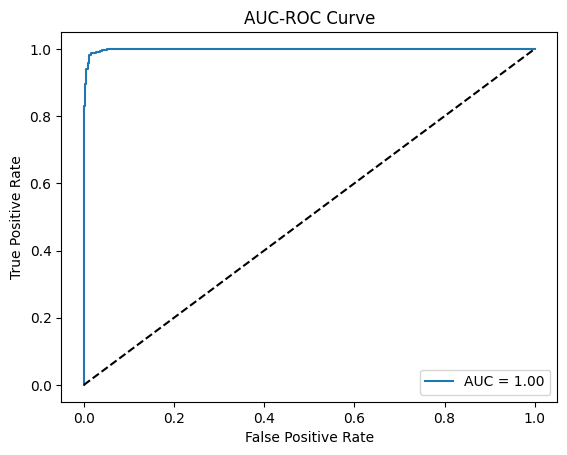

Model saved to vit_pneumonia_predictor.pth


In [2]:
# %%
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# %%
def create_image_dataframe(directory):
    image_paths = []
    labels = []
    for label in ['PNEUMONIA', 'NORMAL']:
        subfolder_path = os.path.join(directory, label)
        for filename in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, filename)
            image_paths.append(file_path)
            labels.append(label)
    
    df = pd.DataFrame({
        'image_path': image_paths,
        'label': labels
    })
    return df

# %%
directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
df = create_image_dataframe(directory)

label_map = {'PNEUMONIA': 0, 'NORMAL': 1}
df['label'] = df['label'].map(label_map)

model_name_or_path = 'google/vit-base-patch16-224-in21k'
vit_feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)
model = ViTForImageClassification.from_pretrained(model_name_or_path, num_labels=2)

# %%
class CustomImageDataset(Dataset):
    def __init__(self, dataframe, feature_extractor):
        self.dataframe = dataframe
        self.feature_extractor = feature_extractor
    
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['image_path']
        label = self.dataframe.iloc[idx]['label']
        
        image = Image.open(img_path).convert("RGB")
        inputs = self.feature_extractor(images=image, return_tensors="pt")
        
        return {
            'pixel_values': inputs['pixel_values'].squeeze(),  
            'label': torch.tensor(label, dtype=torch.long)
        }

# %%
train_df = df.sample(frac=0.75, random_state=42)
test_df = df.drop(train_df.index)

train_dataset = CustomImageDataset(train_df, vit_feature_extractor)
test_dataset = CustomImageDataset(test_df, vit_feature_extractor)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Initialize lists to track metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# %%
for epoch in range(10): 
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch in train_loader:
        inputs = batch['pixel_values'].to(device)
        labels = batch['label'].to(device)
        
        optimizer.zero_grad()
        outputs = model(pixel_values=inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs.logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    print(f"Epoch {epoch+1}, Training Loss: {train_loss}, Training Accuracy: {train_accuracy}")

    # Validation phase
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for batch in test_loader:
            inputs = batch['pixel_values'].to(device)
            labels = batch['label'].to(device)
            
            outputs = model(pixel_values=inputs)
            val_loss = criterion(outputs.logits, labels)
            val_running_loss += val_loss.item()
            
            _, predicted = torch.max(outputs.logits, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_loss = val_running_loss / len(test_loader)
    val_accuracy = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Plotting Training and Validation Loss and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

# %%
# Evaluation on test set
model.eval()
y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for batch in test_loader:
        inputs = batch['pixel_values'].to(device)
        labels = batch['label'].to(device)
        
        outputs = model(pixel_values=inputs)
        _, predicted = torch.max(outputs.logits, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(torch.softmax(outputs.logits, dim=1)[:, 1].cpu().numpy())

# Metrics computation
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

report = classification_report(y_true, y_pred, target_names=['PNEUMONIA', 'NORMAL'], output_dict=True)
print("Classification Report:")
print(report)

# AUC-ROC Calculation
roc_auc = roc_auc_score(y_true, y_scores)
fpr, tpr, _ = roc_curve(y_true, y_scores)

# Plot AUC-ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

# Save the model
model_save_path = "vit_pneumonia_predictor.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")
